# Quickstart 

This notebook serves as a short tutorial on how to use the **clusterxplain** package for calculating feature importance values. We will therefore use the [iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset form [scikit-learn](https://scikit-learn.org/stable/index.html).

## Imports


In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from cxplain.xkm import XkmExplainer

## Fit a k-means clustering

In [4]:
# load iris data
iris = datasets.load_iris()

# set params
n_clusters = 3
X = iris.data
y = iris.target
n_obs = X.shape[0]
n_features = X.shape[1]
feature_names = iris.feature_names

# fit Kmeans
kmeans = KMeans(n_clusters=n_clusters, random_state=3, n_init=10).fit(X)
cluster_centers = kmeans.cluster_centers_
predictions = kmeans.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Explaining the Clustering

In order to explain the clustering produced above **clusterxplain** offers various *Explainers*:

- `XkmExplainer`
- `DecisionTreeExplainer`
- `RandomForestExplainer`
- `ExKMCExplainer`
- `ShapExplainer`
- `NeonExplainer`
- `GradientExplainer`

All explainers expose the same API by having a `fit()`, `explain()`, and `fit_explain()` method implemented. The `explain()` or `fit_explain()` return an instance of the `ExplainedClustering` class, which holds all calculated feature importance values and some convenience functions for plotting.

This tutorial will showcase the *XKM* method, but every other explainer works the same. 

Note that not all explainers calculate point-wise and cluster-wise feature importances, only global ones. `XkmExplainer`, `ShapExplainer`, `NeonExplainer` and `GradientExplainer` calculate all three kinds of importance values.

Note that the `XkmExplainer` comes in two flavours, namely `"next_best"` or `"all"`. Both flavours are described in (TBD). Basically `"next_best"` uses only the the distance to closest cluster on a feture dimension to calculate importance values. whereas `"all"` uses the distances to all clusters. Additionally you have to specify which metric you used for clustering, in our case of ordinary k-means this corresponds to `"euclidean"`, but you could also choose `"manhatten"`.

In [7]:
# fit the explainer and calculate feature importances
explained_clustering = XkmExplainer(data=X, cluster_centers=cluster_centers, flavour="next_best", distance_metric="euclidean", cluster_predictions=predictions).fit_explain()

The resulting instance of the `ExplainedClustering` class can then be used to plot the calculated importance values. You can also retrieve the importance values as dataframe by the property `explained_clustering.pointwise_relevance_df`,`explained_clustering.cluster_relevance_df`, `explained_clustering.global_relevance_df`.

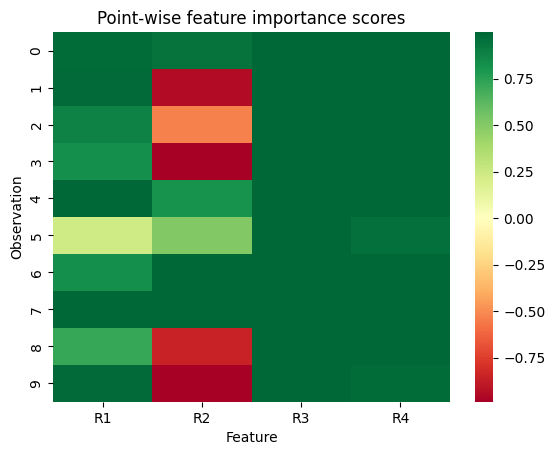

In [8]:
# plot pointwise relevances for observations 1-10
explained_clustering.show_pointwise_relevance(subset_index=list(range(10)))

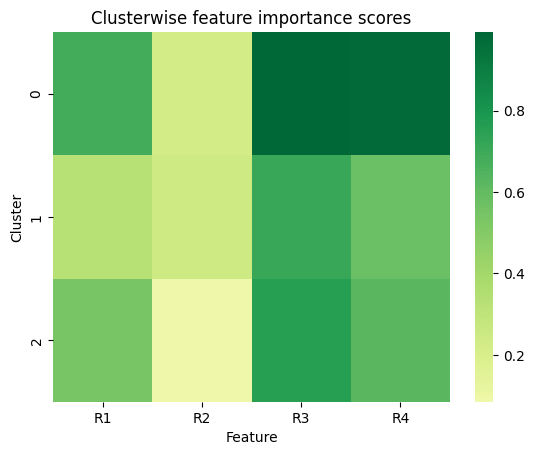

In [9]:
# plot cluster-wise feature importances
explained_clustering.show_cluster_relevance()

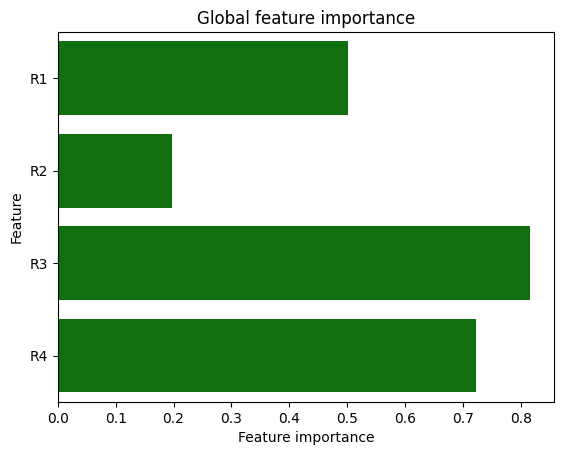

In [10]:
# plot global feature importances
explained_clustering.show_global_relevance()

In [11]:
# retrieve cluster-wise importance values as df
explained_clustering.cluster_relevance_df

,R1,R2,R3,R4
assigned_clusters,,,,
0,0.686290,0.221374,0.992866,0.980448
1,0.328449,0.246249,0.711564,0.578215
2,0.537812,0.084899,0.754957,0.621068
